Here the notes on how to compute the BC to be used in the LSC experiments (reduced in winter and enhanced in 
summer).

In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.path import Path

In [2]:
# First, convert the following files to netcdf with CDO:
## Ocean-surface climatologies: water SST, sea-ice concen. and sfc. temperature
# ln -s $SB/mclim_era5_sswt_1981_2010.grd     fort.21
# ln -s $SB/mclim_era5_icesc_1981_2010.grd    fort.22
# ln -s $SB/mclim_era5_icest_1981_2010.grd    fort.23
## Land-surface climatologies: land temp at 1m, snow depth, soil wetness
# ln -s $SB/mclim_erain_stl1m_1981_2010.grd   fort.24
# ln -s $SB/mclim_erain_snowd_modif.ctl1981_2010.grd   fort.25
# ln -s $SB/mclim_erain_swet_1981_2010.grd    fort.26

# The command to be used is 
# cdo -f nc import_binary in_grads.ctl out_ncdf.nc

# So, in /leonardo_scratch/large/userexternal/ameroni0/speedy_ver42/bc_ver42/clim we do
# module load cdo
# cdo -f nc import_binary mclim_era5_sswt_modif.ctl mclim_era5_sswt.nc
# cdo -f nc import_binary mclim_era5_icesc_modif.ctl mclim_era5_icesc.nc
# cdo -f nc import_binary mclim_era5_icest_modif.ctl mclim_era5_icest.nc
# cdo -f nc import_binary mclim_erain_stl1m_modif.ctl mclim_erain_stl1m.nc
# cdo -f nc import_binary mclim_erain_snowd_modif.ctl mclim_erain_snowd.nc
# cdo -f nc import_binary mclim_erain_swet_modif.ctl mclim_erain_swet.nc

# NB I have to remove the line
#   --> EDEF       1  NAMES     1
# because cdo does not recognize it: I copy the *.ctl files and save them as *modif.ctl files before conversion.
# I also remove the YREV keyword, so that the data are maintained in the proper y direction.

In [3]:
# Second, compute the DJF and JJA averages of all these fields. 

In [2]:
def seasonal_average_ds(ds,label_season):
    if label_season=='JJA':
        seasonal_ave = (ds.isel(time=5) + ds.isel(time=6) + ds.isel(time=7))/3
    elif label_season=='DJF':
        seasonal_ave = (ds.isel(time=0) + ds.isel(time=1) + ds.isel(time=11))/3
    return seasonal_ave

In [4]:
path2clim = '/leonardo_scratch/large/userexternal/ameroni0/speedy_ver42/bc_ver42/clim/'
path2clim = '/home/agostino/Desktop/SPEEDY/speedy_seasonal_forcing/'

varlist = ['sswt','icesc','icest','stl1m','snowd','swet']
eralist = ['era5','era5','era5','erain','erain','erain']

label_season = 'JJA' # 'DJF' or 'JJA'

for kk in range(len(varlist)):
    varname = varlist[kk]
    ds = xr.open_dataset(path2clim+'mclim_'+eralist[kk]+'_'+varname+'.nc')
    ds_sa = seasonal_average_ds(ds,label_season)

    ds_sa.to_netcdf(path2clim+varname+'_'+label_season+'.nc')

In [6]:
# Extract data from a single month and save the corresponding netcdf.
# August - index = 7
label_month = 'aug'

for kk in range(len(varlist)):
    varname = varlist[kk]
    if label_month == 'aug':
        ds = xr.open_dataset(path2clim+'mclim_'+eralist[kk]+'_'+varname+'.nc')
        ds_m = ds.isel(time=7)
        ds_m.to_netcdf(path2clim+varname+'_'+label_month+'.nc')

In [7]:
kk = 0
varname = varlist[kk]
ds = xr.open_dataset(path2clim+'mclim_'+eralist[kk]+'_'+varlist[kk]+'.nc')
ds_sa = seasonal_average_ds(ds,label_season)

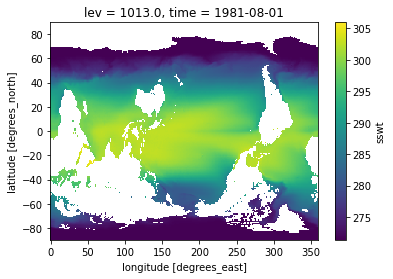

In [8]:
ds_sa[varname].isel(lev=0).plot()

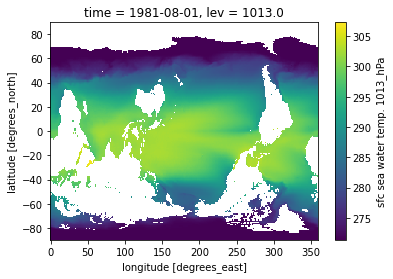

In [11]:
ds_test = xr.open_dataset(path2clim+'sswt_'+label_month+'.nc')
ds_test['sswt'].isel(lev=0).plot()

In [ ]:
# You would need something like this to reverse the yaxis!

#sa_modif = ds_sa[varname][0].values
sa_modif = np.flipud(ds_sa[varname][0].values)
ds_sa_yrev = ds_sa.copy()
ds_sa_yrev[varname][0] = sa_modif # np.flipud(sa_modif)
# If I plot now da_sa it is also reversed, and I don't know why.
# However, by saving the netcdf before reversing the data things should be fine.

ds_sa_yrev[varname][0].plot()

In [ ]:
ds_sa['snowd'][0].plot()

Testing on sswt
----------------------------------------


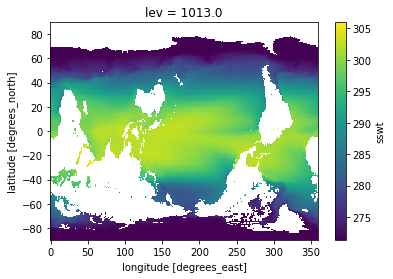

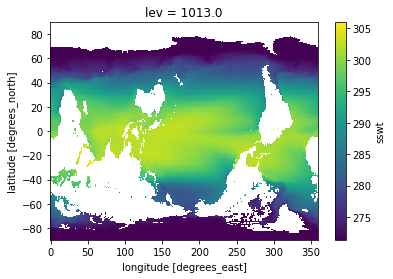

In [20]:
# Third, we interpolate the recently created seasonal files on the grid of an original BC file, with CDO.
# I use conservative remapping (in the path2clim folder)

# cdo remapcon,targetgrid  ifile  ofile

# So, for example I do
#  cdo remapcon,mclim_era5_icesc.nc sswt_JJA.nc sswt_JJA_speedygrid.nc
#  cdo remapcon,mclim_era5_icesc.nc icesc_JJA.nc icesc_JJA_speedygrid.nc
#  cdo remapcon,mclim_era5_icesc.nc icest_JJA.nc icest_JJA_speedygrid.nc
#  cdo remapcon,mclim_era5_icesc.nc stl1m_JJA.nc stl1m_JJA_speedygrid.nc
#  cdo remapcon,mclim_era5_icesc.nc snowd_JJA.nc snowd_JJA_speedygrid.nc
#  cdo remapcon,mclim_era5_icesc.nc swet_JJA.nc swet_JJA_speedygrid.nc
#  cdo remapcon,mclim_era5_icesc.nc swet_DJF.nc swet_DJF_speedygrid.nc
#  cdo remapcon,mclim_era5_icesc.nc snowd_DJF.nc snowd_DJF_speedygrid.nc
#  cdo remapcon,mclim_era5_icesc.nc stl1m_DJF.nc stl1m_DJF_speedygrid.nc
#  cdo remapcon,mclim_era5_icesc.nc icest_DJF.nc icest_DJF_speedygrid.nc
#  cdo remapcon,mclim_era5_icesc.nc icesc_DJF.nc icesc_DJF_speedygrid.nc
#  cdo remapcon,mclim_era5_icesc.nc sswt_DJF.nc sswt_DJF_speedygrid.nc

# Check the same file as before.
print('Testing on '+ varlist[kk])
print('----------------------------------------')
ds_interp = xr.open_dataset(path2clim+varlist[kk]+'_'+label_season+'_speedygrid.nc')
ds_interp[varlist[kk]].plot()
plt.show()
# The interpolation looks correct.

ds_interp_m = xr.open_dataset(path2clim+varlist[kk]+'_'+label_month+'_speedygrid.nc')
ds_interp[varlist[kk]].plot()
plt.show()
# The interpolation looks correct.

In [ ]:
# Fourth, with grads we convert the seasonal averaged netcdf files.
# Within grads, use the scripts 
test_bc_sst.gs sswt DJF
test_bc_sst.gs stl1m DJF
test_bc_sst.gs icest DJF
test_bc_sst.gs icesc DJF
test_bc_sst.gs snowd DJF
test_bc_swet.gs swet DJF

# From the terminal, instead, run the test_ctl files as
./test_ctl_sst.s sswt DJF -999
./test_ctl_sst.s stl1m DJF -999
./test_ctl_sst.s icesc DJF -999
./test_ctl_sst.s icest DJF -999
./test_ctl_sst.s snowd DJF -999
./test_ctl_swet.s swet DJF -999

# Note that the same scripts can be used for the monthly data as well, it is enough to replace DJF and JJA with
# the three letters of the month of interest.

In [2]:
# On my local machine I run this part where I compare the CMIP6 forcing files in the historical period with the 
# ERA5/ERA-Interim derived files. Then I want to add the future forcing.

season_label = 'JJA' # 'DJF' or 'JJA'

path2speedy = './speedy_seasonal_forcing/'
path2cmip6 = './cmip6_forcing/'

In [3]:
# Sea surface temperature
varname = 'sea surface temperature'
files = path2speedy + 'sswt_'+season_label+'_speedygrid.nc'
filech = path2cmip6 + season_label+'_MMM_tos_single_member_1979-2008.nc' # historical
filecf = path2cmip6 + season_label+'_MMM_tos_single_member_2071-2100.nc' # future

In [4]:
dss_sst = xr.open_dataset(files)
dsch_sst = xr.open_dataset(filech)
dscf_sst = xr.open_dataset(filecf)

In [5]:
dss_sst

<xarray.Dataset>
Dimensions:  (lat: 180, lev: 1, lon: 360)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.24 -88.25 -87.25 -86.26 ... 87.25 88.25 89.24
  * lev      (lev) float64 1.013e+03
Data variables:
    sswt     (lev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.2.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Oct 24 12:47:55 2024: cdo remapcon,mclim_era5_icesc.nc ...
    CDO:          Climate Data Operators version 2.2.2 (https://mpimet.mpg.de...

In [6]:
dsch_sst

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
    season     object ...
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    tos        (latitude, longitude) float64 ...

In [7]:
dscf_sst

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
    season     object ...
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    tos        (latitude, longitude) float64 ...

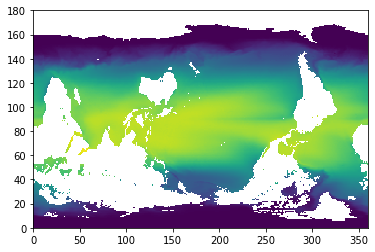

In [8]:
plt.pcolormesh(dss_sst.sswt[0].values)

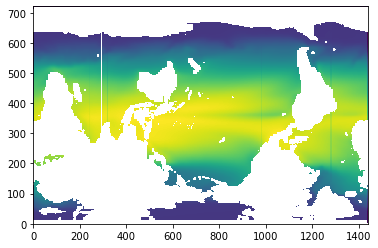

In [9]:
plt.pcolormesh(dsch_sst.tos.values)

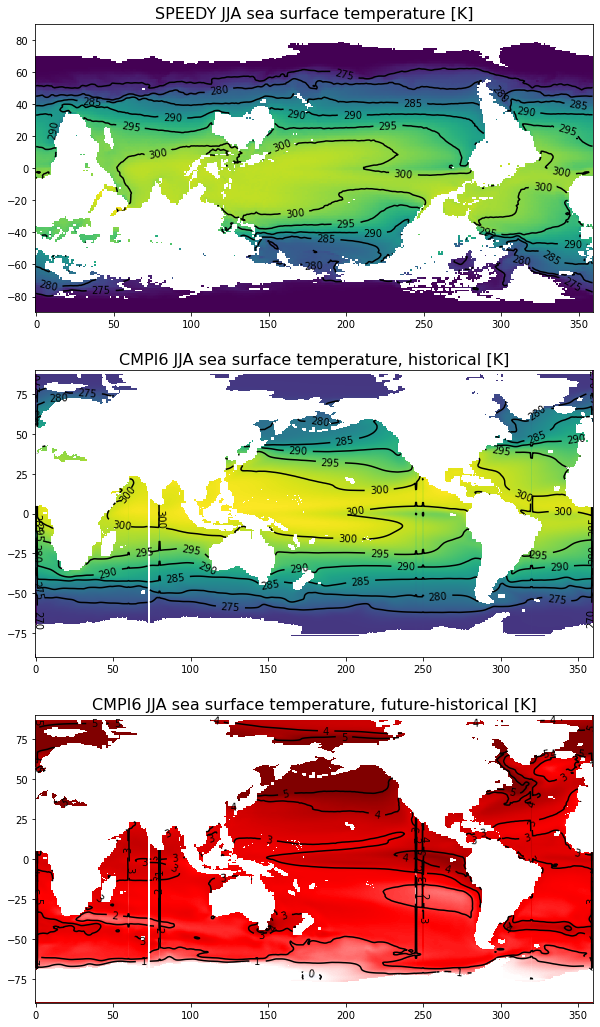

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,18))

levels = np.arange(270,310,5)

ax1.set_title('SPEEDY '+ season_label+' '+varname+' [K]',fontsize=16)
ax1.pcolormesh(dss_sst.lon.values,dss_sst.lat.values,dss_sst.sswt.isel(lev=0).values,shading='nearest')
cs = ax1.contour(dss_sst.lon.values,dss_sst.lat.values,dss_sst.sswt.isel(lev=0).values,colors='k',levels=levels)
ax1.clabel(cs, inline=True, fontsize=10)

ax2.set_title('CMPI6 '+ season_label+' '+varname+', historical [K]',fontsize=16)
ax2.pcolormesh(dsch_sst.longitude.values,dsch_sst.latitude.values,dsch_sst.tos.values/dsch_sst.tos.counter+273.15,shading='nearest')
cs = ax2.contour(dsch_sst.longitude.values,dsch_sst.latitude.values,dsch_sst.tos.values/dsch_sst.tos.counter+273.15,colors='k',levels=levels)
ax2.clabel(cs, inline=True, fontsize=10)
# tos has to be divided by the number of members used and converted to Kelvin

# Future - past difference
delta_tos = dscf_sst.tos/dscf_sst.tos.counter - dsch_sst.tos/dsch_sst.tos.counter

ax3.set_title('CMPI6 '+ season_label+' '+varname+', future-historical [K]',fontsize=16)
ax3.pcolormesh(dsch_sst.longitude.values,dsch_sst.latitude.values,delta_tos.values,shading='nearest',cmap='seismic',vmin=-5,vmax=5)
cs = ax3.contour(dsch_sst.longitude.values,dsch_sst.latitude.values,delta_tos.values,colors='k',levels=np.arange(-5,6,1))
ax3.clabel(cs, inline=True, fontsize=10)
# tos has to be divided by the number of members used and converted to Kelvin

plt.savefig('bc_lsc_sea-surface-temperature_'+season_label+'.png',bbox_inches='tight')

In [11]:
# Land surface temperature
varname = 'land surface temperature'
files = path2speedy + 'stl1m_'+season_label+'_speedygrid.nc'
filech = path2cmip6 + season_label+'_MMM_tsl_single_member_1979-2008.nc' # historical
filecf = path2cmip6 + season_label+'_MMM_tsl_single_member_2071-2100.nc' # future

In [12]:
dss_lst = xr.open_dataset(files)
dsch_lst = xr.open_dataset(filech)
dscf_lst = xr.open_dataset(filecf)

In [13]:
dss_lst

<xarray.Dataset>
Dimensions:  (lat: 180, lev: 1, lon: 360)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.24 -88.25 -87.25 -86.26 ... 87.25 88.25 89.24
  * lev      (lev) float64 1.013e+03
Data variables:
    stl1m    (lev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.2.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Oct 24 12:47:57 2024: cdo remapcon,mclim_era5_icesc.nc ...
    CDO:          Climate Data Operators version 2.2.2 (https://mpimet.mpg.de...

In [14]:
dsch_lst

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
    season     object ...
    lon        (longitude) float32 ...
    lat        (latitude) float32 ...
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    tsl        (latitude, longitude) float64 ...

<a list of 225 text.Text objects>

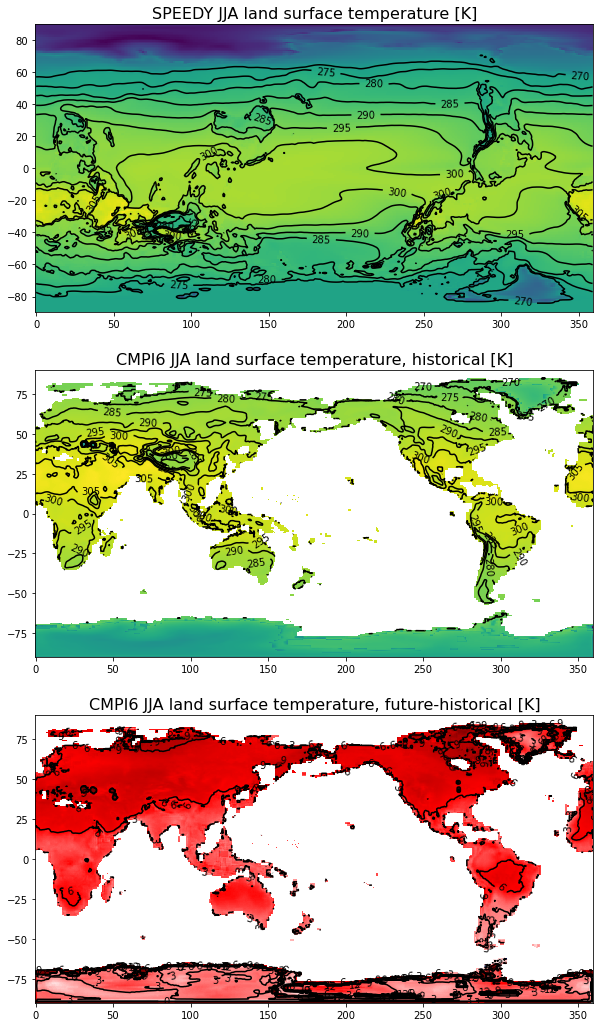

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,18))

levels = np.arange(270,310,5)

ax1.set_title('SPEEDY '+ season_label+' '+varname+' [K]',fontsize=16)
ax1.pcolormesh(dss_lst.lon.values,dss_lst.lat.values,dss_lst.stl1m.isel(lev=0).values,shading='nearest')
cs = ax1.contour(dss_lst.lon.values,dss_lst.lat.values,dss_lst.stl1m.isel(lev=0).values,colors='k',levels=levels)
ax1.clabel(cs, inline=True, fontsize=10)

ax2.set_title('CMPI6 '+ season_label+' '+varname+', historical [K]',fontsize=16)
ax2.pcolormesh(dsch_lst.longitude.values,dsch_lst.latitude.values,dsch_lst.tsl.values,shading='nearest')
#cs = ax2.contour(dsch_lst.longitude.values,dsch_lst.latitude.values,dsch_lst.tsl.values/dsch_lst.tsl.counter,colors='k',levels=levels)
cs = ax2.contour(dsch_lst.longitude.values,dsch_lst.latitude.values,dsch_lst.tsl.values,colors='k',levels=levels)
ax2.clabel(cs, inline=True, fontsize=10)
# tos has to be divided by the number of members used and converted to Kelvin

# Future - past difference
#delta_tsl = dscf_lst.tsl/dscf_lst.tsl.counter - dsch_lst.tsl/dsch_lst.tsl.counter
delta_tsl = dscf_lst.tsl - dsch_lst.tsl

ax3.set_title('CMPI6 '+ season_label+' '+varname+', future-historical [K]',fontsize=16)
ax3.pcolormesh(dsch_lst.longitude.values,dsch_lst.latitude.values,delta_tsl.values,shading='nearest',cmap='seismic',vmin=-12,vmax=12)
cs = ax3.contour(dsch_lst.longitude.values,dsch_lst.latitude.values,delta_tsl.values,colors='k',levels=np.arange(-12,15,3))
ax3.clabel(cs, inline=True, fontsize=10)
# tos has to be divided by the number of members used and converted to Kelvin

In [16]:
# Run this cell once.
delta_tos = delta_tos.rename({'longitude': 'lon','latitude': 'lat'})
delta_tsl = delta_tsl.drop_vars(('lon','lat'))
delta_tsl = delta_tsl.rename({'longitude': 'lon','latitude': 'lat'})

In [17]:
# Now interpolate the delta fields on the SPEEDY grid and create the modified SPEEDY boundary condition files for
# the reduced and enhanced LSC experiments.

delta_tos_speedygrid = delta_tos.interp_like(dss_sst.sswt)
delta_tsl_speedygrid = delta_tsl.interp_like(dss_lst.stl1m)

# Reverse the y direction of the deltas
delta_tos_modif = np.flipud(delta_tos_speedygrid.values)
delta_tsl_modif = np.flipud(delta_tsl_speedygrid.values)

# Remove the outliers
x = delta_tsl_modif.flatten()
x_mean = np.nanmean(x)
x_std = np.nanstd(x)
delta_tsl_modif[delta_tsl_modif<x_mean-3*x_std] = x_mean
delta_tsl_modif[delta_tsl_modif>x_mean+3*x_std] = x_mean

da_warm_sst = dss_sst.sswt + delta_tos_modif
da_warm_lst = dss_lst.stl1m + delta_tsl_modif

da_warm_sst = da_warm_sst.fillna(-999)
da_warm_lst = da_warm_lst.fillna(-999)

dss_warm_sst = da_warm_sst.to_dataset(name='sswt')
dss_warm_lst = da_warm_lst.to_dataset(name='stl1m')

#sswt_modif = np.flipud(da_warm_sst[0].values)
#dss_warm_sst['sswt'][0] = sswt_modif

dss_warm_sst.to_netcdf('sswt_'+season_label+'_warmed_speedygrid.nc')
dss_warm_lst.to_netcdf('stl1m_'+season_label+'_warmed_speedygrid.nc')

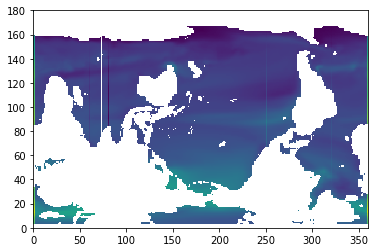

In [18]:
plt.pcolormesh(delta_tos_modif)

In [19]:
dss_warm_sst

<xarray.Dataset>
Dimensions:  (lat: 180, lev: 1, lon: 360)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.24 -88.25 -87.25 -86.26 ... 87.25 88.25 89.24
  * lev      (lev) float64 1.013e+03
Data variables:
    sswt     (lev, lat, lon) float64 -999.0 -999.0 -999.0 ... -999.0 -999.0

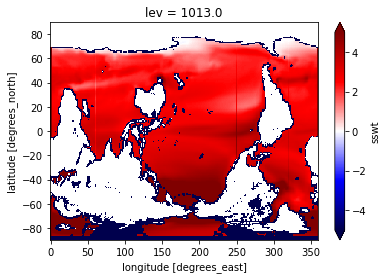

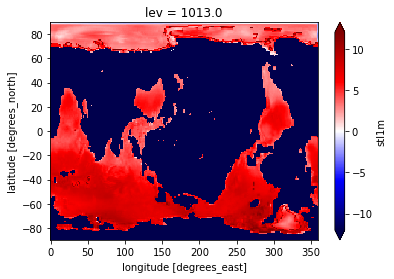

In [20]:
# Check that the values in the new files are reasonable.
test_delta_sst = dss_warm_sst.sswt-dss_sst.sswt
test_delta_sst.plot(vmin=-5,vmax=5,cmap='seismic')
plt.show()

test_delta_lst = dss_warm_lst.stl1m-dss_lst.stl1m
test_delta_lst.plot(vmin=-12,vmax=12,cmap='seismic')
plt.show()

In [21]:
x

array([        nan,         nan,         nan, ..., -0.53796723,
       -0.54141406, -1.63098866])

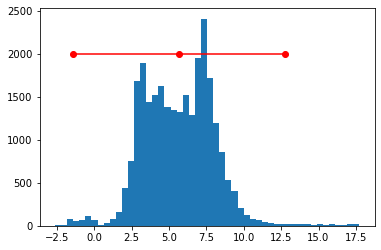

In [22]:
x = test_delta_lst[0].values.flatten()
x[x<-500] = np.nan

plt.hist(x,bins=50)

# Outlier removal
x_mean = np.nanmean(x)
x_std = np.nanstd(x)
plt.plot([x_mean-3*x_std,x_mean,x_mean+3*x_std],[2000,2000,2000],'o-r')

In [23]:
len(oo)

NameError: name 'oo' is not defined

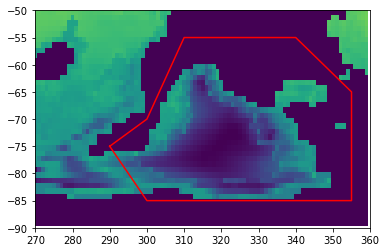

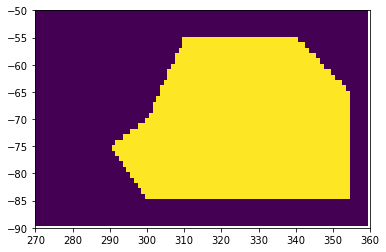

In [24]:
# Now I want to remove the forcing in soil temperature from Greenland and Antarctica 
# (should we do it over snow as well??? e.g. over the Himalayas?).

oo = dss_warm_lst.lon.values
aa = dss_warm_lst.lat.values
tt = dss_warm_lst.stl1m[0].values

plt.pcolormesh(oo,aa,tt,vmin=250,vmax=310,shading='nearest')
plt.xlim([270,360])
plt.ylim([-90,-50])
plt.plot([290,300,310,340,355,355,300,290],[-75,-70,-55,-55,-65,-85,-85,-75],'r')
plt.show()

# Define the vertices of the polygon to be used to create a mask (x,y).
poly_verts = [(290,-75),(300,-70),(310,-55),(340,-55),(355,-65),(355,-85),(300,-85),(290,-75)]

# Create a grid
nx, ny = len(oo), len(aa)
#x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x, y = np.meshgrid(oo,aa)

# Create vertex coordinates for each grid cell.
# (<0,0> is at the top left of the grid in this system)
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

path = Path(poly_verts)
greenland_mask = path.contains_points(points)
greenland_mask = greenland_mask.reshape((ny,nx))

plt.xlim([270,360])
plt.ylim([-90,-50])
plt.pcolormesh(oo,aa,greenland_mask,shading='nearest')
plt.show()

In [25]:
# Impose that the warming over Greenland is zero

da_warm_lst = dss_lst.stl1m + delta_tsl_modif*(1-greenland_mask)
da_warm_lst = da_warm_lst.fillna(-999)
dss_warm_lst = da_warm_lst.to_dataset(name='stl1m')
dss_warm_lst.to_netcdf('stl1m_'+season_label+'_warmed_speedygrid_zerowarming_greenland.nc')

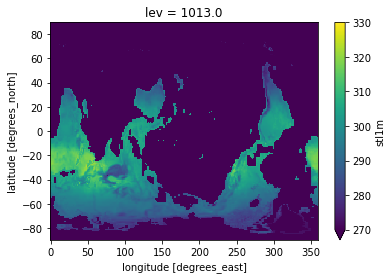

In [26]:
# Try to read a final file from scratch
test_read = xr.open_dataset('stl1m_JJA_warmed_speedygrid_zerowarming_greenland.nc')
test_read.stl1m.plot(vmin=270,vmax=330)

In [27]:
# On LEONARDO then I need to convert the netcdf in grd files with
# test_bc_sst_warmed.gs sswt DJF
# test_bc_sst_warmed.gs stl1m DJF

# and then write the ctl files
# test_ctl_warmed.s sswt DJF -999
# test_ctl_warmed.s stl1m DJF -999

In [30]:
# Here I read the climatological file for stl1m and I add the JJA warm land anomaly.
clim_file = path2clim + 'mclim_erain_stl1m.nc'
ds_clim = xr.open_dataset(clim_file)

ds_clim

<xarray.Dataset>
Dimensions:  (lat: 180, lev: 1, lon: 360, time: 12)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 1981-12-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.24 -88.25 -87.25 -86.26 ... 87.25 88.25 89.24
  * lev      (lev) float64 1.013e+03
Data variables:
    stl1m    (time, lev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.2.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Oct 24 12:38:23 2024: cdo -f nc import_binary mclim_era...
    CDO:          Climate Data Operators version 2.2.2 (https://mpimet.mpg.de...

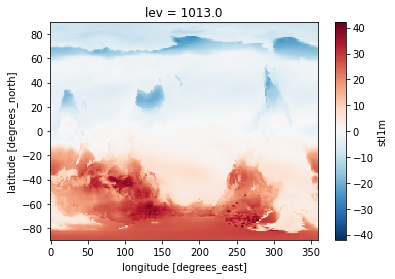

In [43]:
clim_jan = ds_clim.stl1m.isel(time=0).isel(lev=0)
clim_jul = ds_clim.stl1m.isel(time=6).isel(lev=0)

diff = clim_jul-clim_jan
diff.plot()

In [44]:
# Add the JJA LST warming in all months and save the netcdf file.

ds_clim_warm = ds_clim + delta_tsl_modif
ds_clim_warm = ds_clim_warm.fillna(-999)
ds_clim_warm.to_netcdf('stl1m_mclim_'+season_label+'_warmed_speedygrid.nc')

0


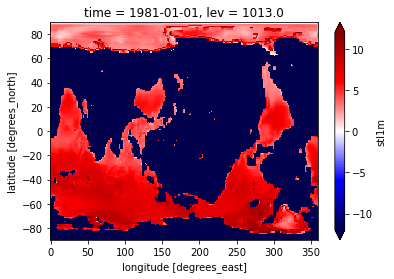

1


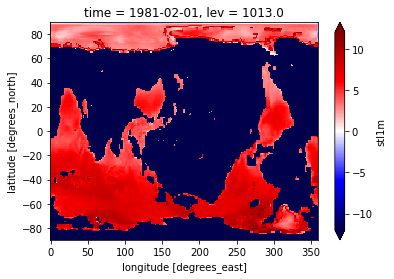

2


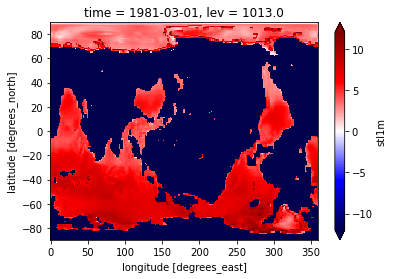

3


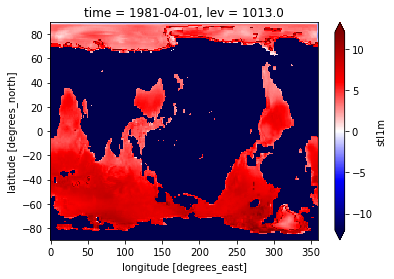

4


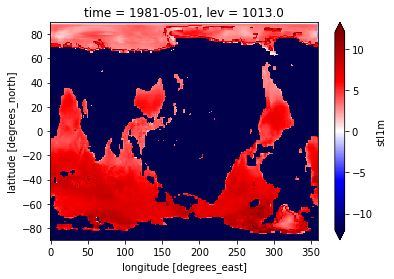

5


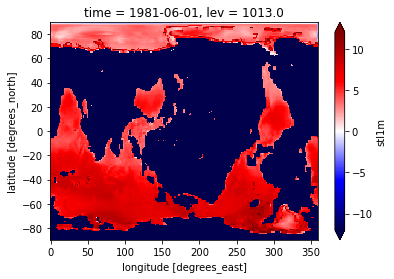

6


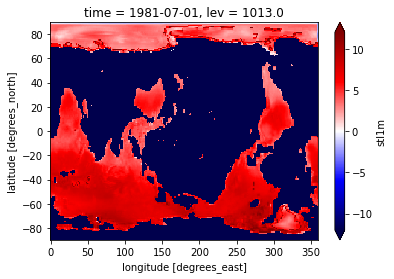

7


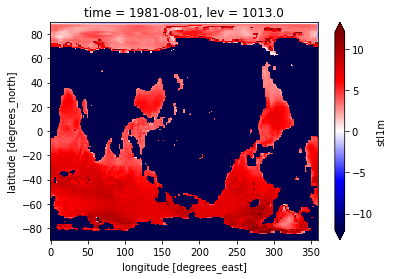

8


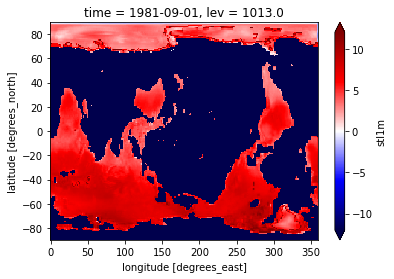

9


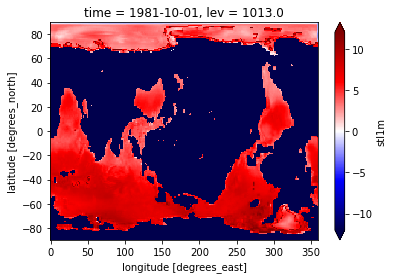

10


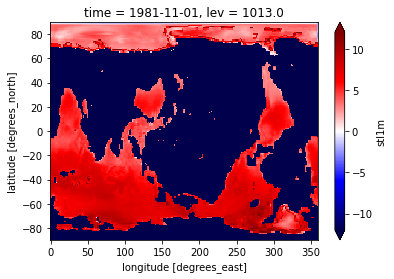

11


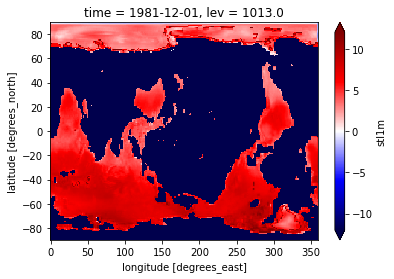

In [47]:
for tt in range(12):
    print(tt)
    test = ds_clim_warm.stl1m[tt]-ds_clim.stl1m[tt]
    test.plot(vmin=-12,vmax=12,cmap='seismic')
    plt.show()

In [52]:
ds_clim_warm.time

<xarray.DataArray 'time' (time: 12)>
array(['1981-01-01T00:00:00.000000000', '1981-02-01T00:00:00.000000000',
       '1981-03-01T00:00:00.000000000', '1981-04-01T00:00:00.000000000',
       '1981-05-01T00:00:00.000000000', '1981-06-01T00:00:00.000000000',
       '1981-07-01T00:00:00.000000000', '1981-08-01T00:00:00.000000000',
       '1981-09-01T00:00:00.000000000', '1981-10-01T00:00:00.000000000',
       '1981-11-01T00:00:00.000000000', '1981-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 1981-12-01
Attributes:
    standard_name:  time
    axis:           T

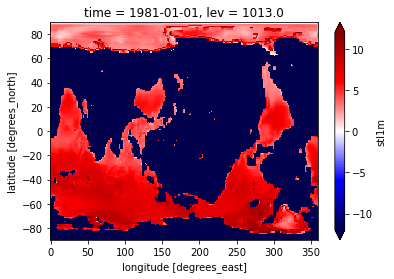

In [51]:
prova = xr.open_dataset('stl1m_mclim_'+season_label+'_warmed_speedygrid.nc')

tt=0
prova_fig = prova.stl1m[tt]-ds_clim.stl1m[tt]
prova_fig.plot(vmin=-12,vmax=12,cmap='seismic')